In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
veri = pd.read_csv("wine_metrics.csv")
kalite = pd.read_csv("quality.csv").drop(["Vineyard","Wine"],axis=1)
df = pd.concat([veri,kalite],axis=1)
df.head()


,Vineyard,Wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,West,1480,7.4,0.53,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,5,red
1,East,553,7.0,0.24,0.34,1.4,0.031,27.0,107.0,0.99000,3.06,0.39,11.9,6,white
2,West,1457,6.8,0.13,0.39,1.4,0.034,19.0,102.0,0.99121,3.23,0.60,11.3,7,white
3,South,1048,5.8,0.22,0.29,0.9,0.034,34.0,89.0,0.98936,3.14,0.36,11.1,7,white
4,East,1420,6.2,0.35,0.31,2.6,0.036,37.0,92.0,0.98938,3.27,0.53,12.8,7,white


In [4]:

kalite.quality.value_counts().sort_values()

quality
9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: count, dtype: int64

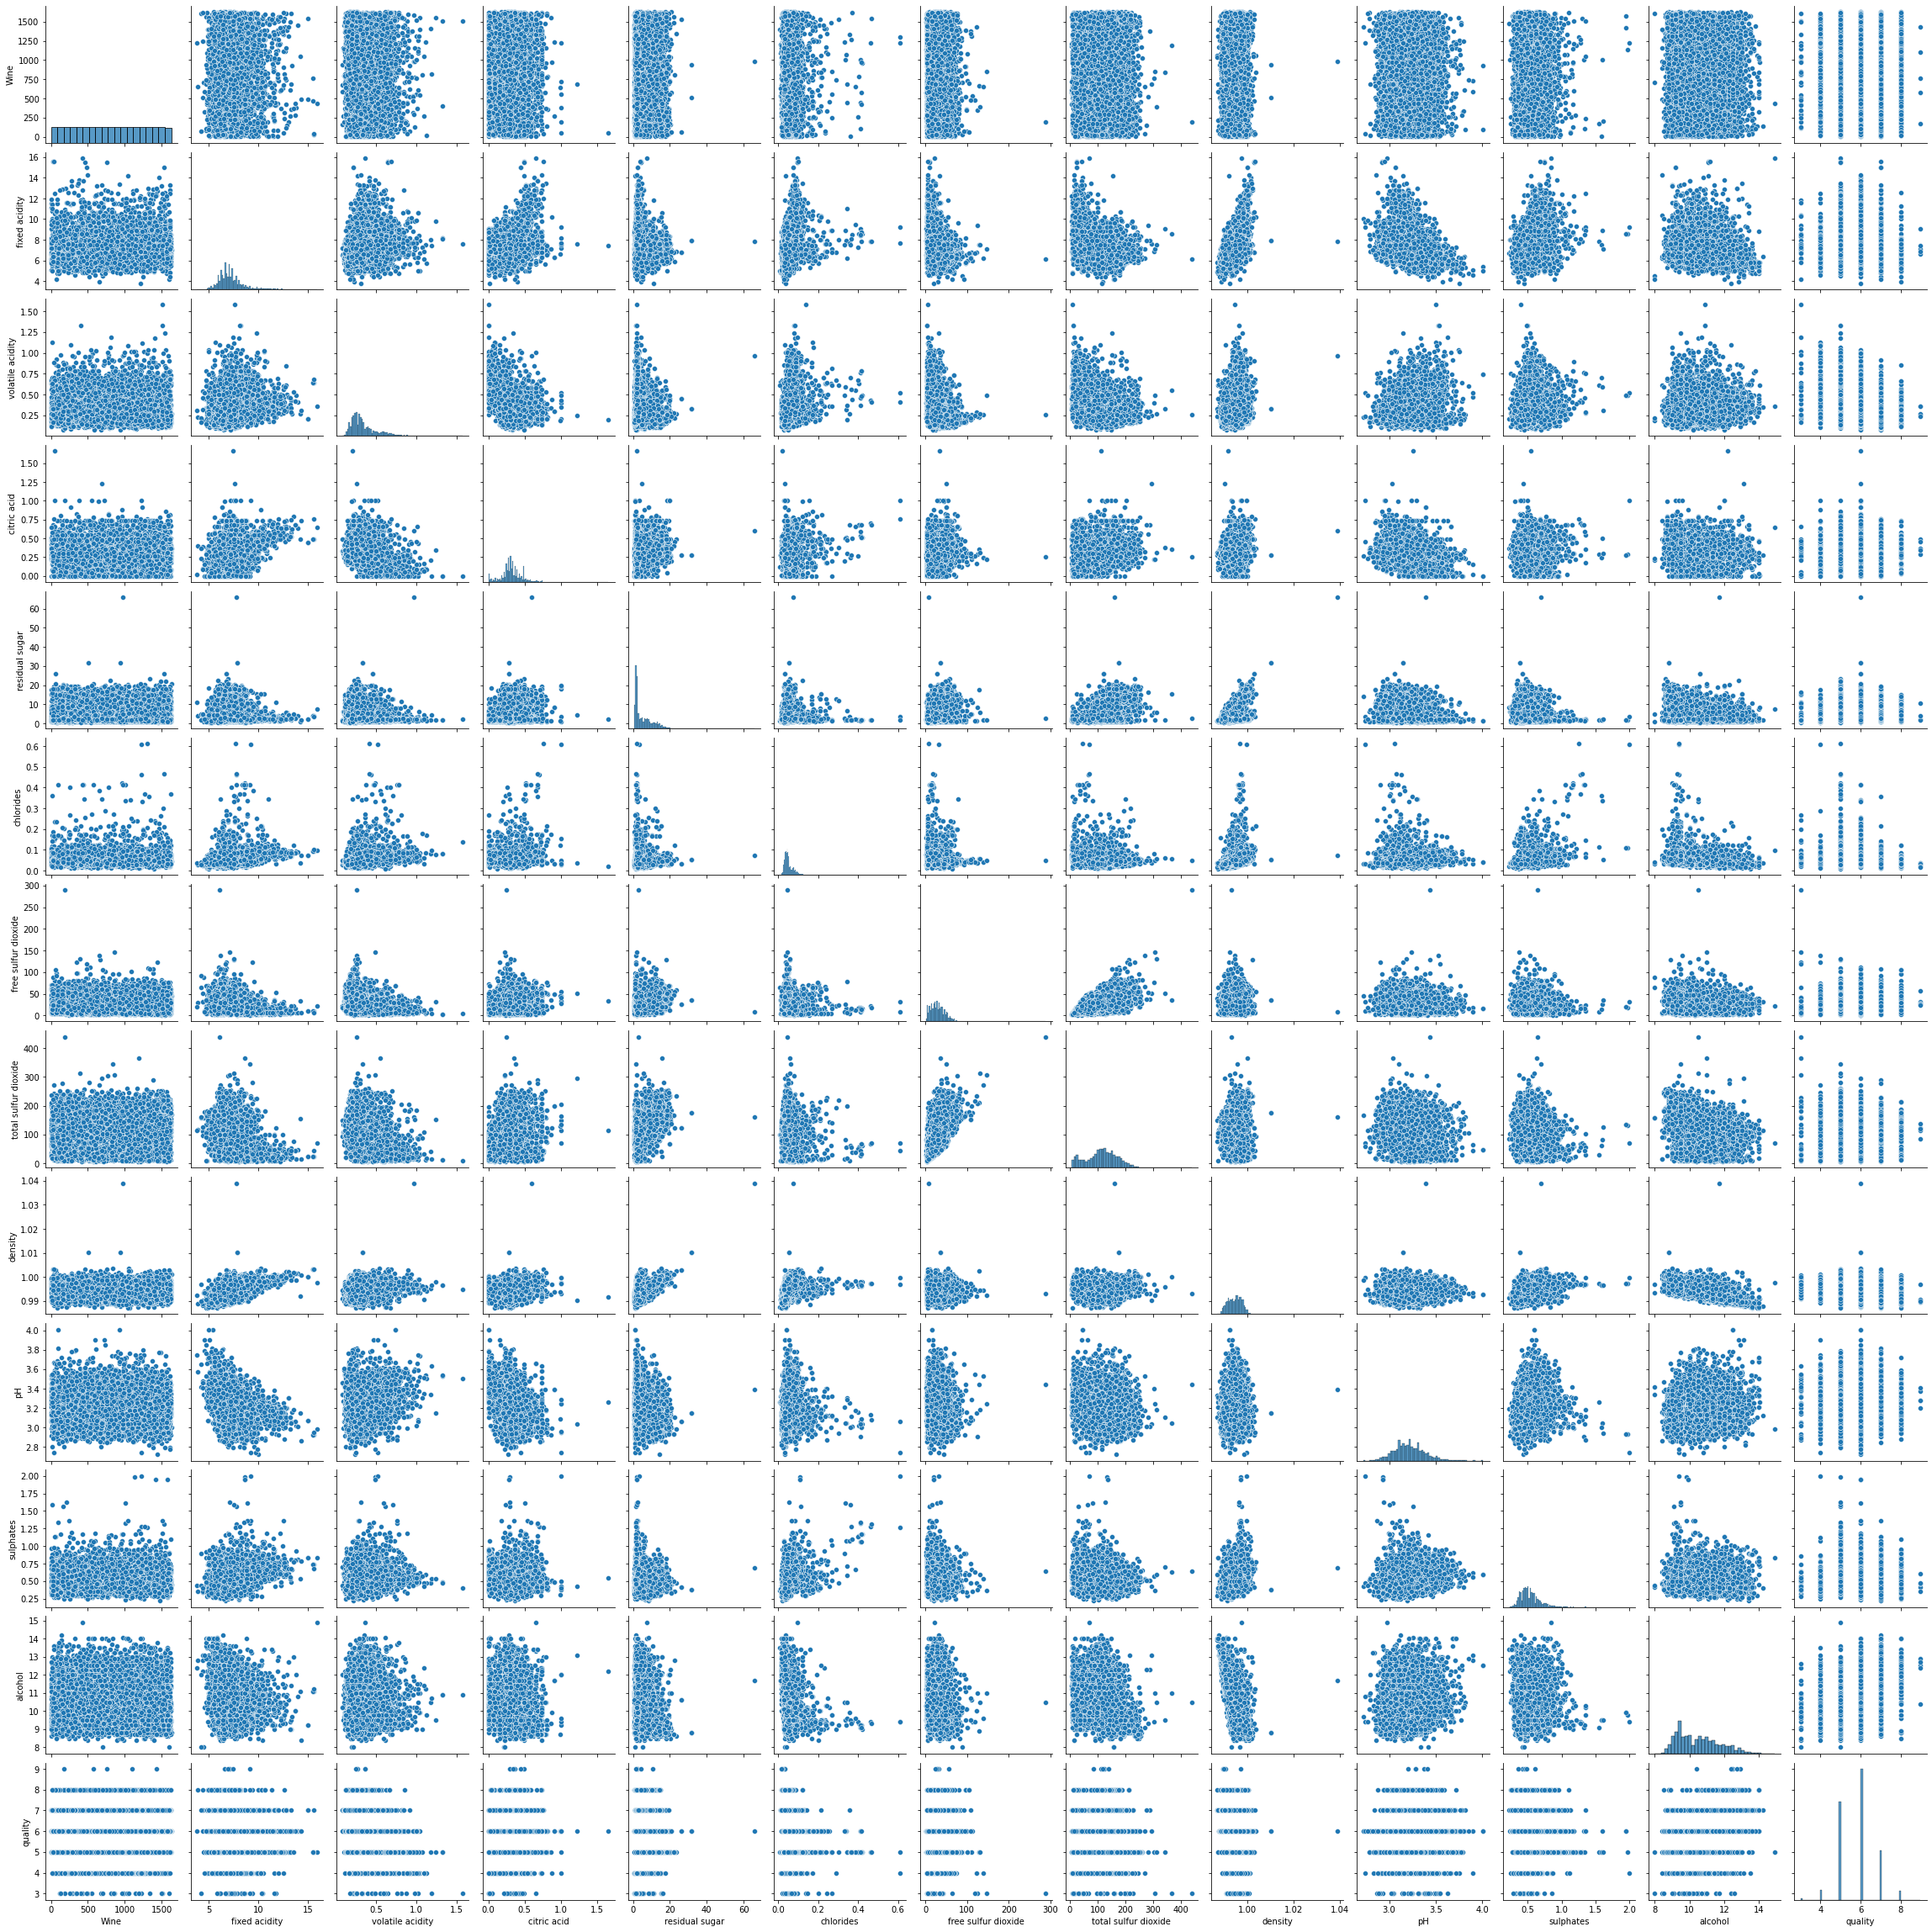

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vineyard              6497 non-null   object 
 1   Wine                  6497 non-null   int64  
 2   fixed acidity         6497 non-null   float64
 3   volatile acidity      6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   residual sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  color                 6497 non-null   object 
dtypes: float64(11), int64

<AxesSubplot:>

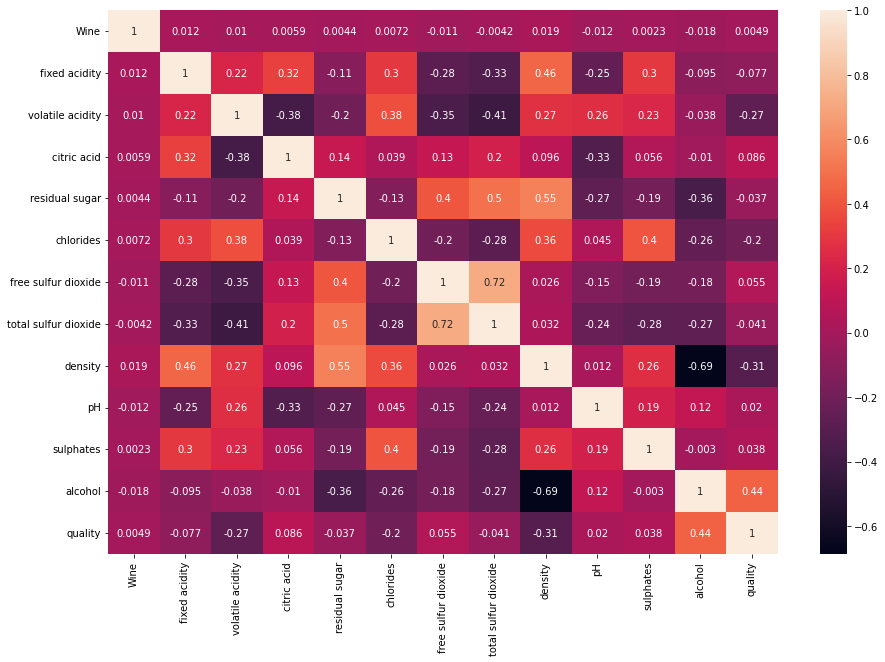

In [23]:
import  seaborn as sns
corr = df.drop(["Vineyard","Vineyard","color"],axis=1).corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)


In [33]:
df = df.drop(['color','Vineyard','Wine','color','Vineyard','Wine'],axis=1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.53,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,5
1,7.0,0.24,0.34,1.4,0.031,27.0,107.0,0.99000,3.06,0.39,11.9,6
2,6.8,0.13,0.39,1.4,0.034,19.0,102.0,0.99121,3.23,0.60,11.3,7
3,5.8,0.22,0.29,0.9,0.034,34.0,89.0,0.98936,3.14,0.36,11.1,7
4,6.2,0.35,0.31,2.6,0.036,37.0,92.0,0.98938,3.27,0.53,12.8,7


In [34]:
X = df.drop(["quality"],axis=1).values
y = df["quality"].values


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor



In [60]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size=0.2, random_state=42)

dtc  =DecisionTreeClassifier()

dtc.fit(Xtrain,ytrain)
pred = dtc.predict(Xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = accuracy_score(ytest,pred)
conf  = confusion_matrix(ytest,pred)
cr = classification_report(ytest,pred)

print(acc)
print(" ")
print(conf)
print(cr)

0.6284615384615385
 
[[  1   1   4   1   0   0   0]
 [  1  12  18   9   0   1   0]
 [  0  20 311 101  15   7   0]
 [  1  18  97 349  71  13   0]
 [  0   2   9  71 130  10   0]
 [  0   0   0   6   6  14   0]
 [  0   0   0   0   0   1   0]]
              precision    recall  f1-score   support

           3       0.33      0.14      0.20         7
           4       0.23      0.29      0.26        41
           5       0.71      0.69      0.70       454
           6       0.65      0.64      0.64       549
           7       0.59      0.59      0.59       222
           8       0.30      0.54      0.39        26
           9       0.00      0.00      0.00         1

    accuracy                           0.63      1300
   macro avg       0.40      0.41      0.40      1300
weighted avg       0.64      0.63      0.63      1300



In [67]:
dtr  =DecisionTreeRegressor()

dtr.fit(Xtrain,ytrain)
pred = dtr.predict(Xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = accuracy_score(ytest,pred)
conf  = confusion_matrix(ytest,pred)
cr = classification_report(ytest,pred)

print(acc)
print(" ")
print(conf)
print(cr)

0.62
 
[[  0   2   2   1   2   0   0]
 [  0  14  13  10   4   0   0]
 [  2  23 289 118  21   1   0]
 [  1  13 102 358  65  10   0]
 [  0   3   9  75 129   6   0]
 [  0   0   1   5   4  16   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.25      0.34      0.29        41
           5       0.69      0.64      0.66       454
           6       0.63      0.65      0.64       549
           7       0.57      0.58      0.58       222
           8       0.48      0.62      0.54        26
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1300
   macro avg       0.38      0.40      0.39      1300
weighted avg       0.62      0.62      0.62      1300



In [68]:
rfc  =RandomForestClassifier()

rfc.fit(Xtrain,ytrain)
pred = rfc.predict(Xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = accuracy_score(ytest,pred)
conf  = confusion_matrix(ytest,pred)
cr = classification_report(ytest,pred)

print(acc)
print(" ")
print(conf)
print(cr)

0.7107692307692308
 
[[  0   0   6   1   0   0   0]
 [  0   8  25   7   1   0   0]
 [  1   2 337 112   2   0   0]
 [  0   0  82 436  31   0   0]
 [  0   0   2  88 130   2   0]
 [  0   0   0   8   5  13   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.80      0.20      0.31        41
           5       0.75      0.74      0.74       454
           6       0.67      0.79      0.73       549
           7       0.76      0.59      0.66       222
           8       0.87      0.50      0.63        26
           9       0.00      0.00      0.00         1

    accuracy                           0.71      1300
   macro avg       0.55      0.40      0.44      1300
weighted avg       0.72      0.71      0.70      1300

